<a href="https://colab.research.google.com/github/Lusca3006/Analise-Logistica/blob/main/analise_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# **1️⃣ Carregar a base de dados**

In [ ]:
# Carregar os dados do arquivo Excel para análise.

file_path = "/content/drive/MyDrive/analise logistica/BD_Logistica.xlsx"
df = pd.read_excel(file_path)

#**2️⃣ Exibir as primeiras linhas do dataset para inspeção**

In [ ]:
# Visualizar as primeiras linhas para entender a estrutura dos dados.

print(df.head())

  Nº Pedido             Cliente - Motorista Data Emissão Pedido  \
0        A3            WALMART-FELIPE SILVA          2019-01-27   
1        A4   MAGAZINE LUIZA-TÚLIO SILVEIRA          2019-01-28   
2        A7  MAGAZINE LUIZA-VALDIR ESPINOSA          2019-02-04   
3       A12     MAGAZINE LUIZA-MARCOS LEROY          2019-02-18   
4       A15             WALMART-LUIZ PARDAL          2019-02-21   

  Data Entrega Prevista Destino  Itens  R$ Faturados Saída para Entrega  \
0            2019-02-06      SP      3         139.5         2019-01-29   
1            2019-02-07      RJ      4         134.4         2019-02-09   
2            2019-02-14      SP      5          79.5         2019-02-07   
3            2019-02-28      SP     20         326.0         2019-02-23   
4            2019-03-03      RJ     12         597.6         2019-02-28   

  Data Entrega Real   Qtd Devolução  Mot. Devolução  Dias Para Entrega  \
0        2019-02-03               0      S/ Devolu.                  7  

#**3️⃣ Verificar valores nulos em cada coluna**

In [ ]:
# Identificar possíveis valores nulos para tratá-los.

def verificar_nulos(df):
    print("Valores nulos por coluna:")
    print(df.isnull().sum())
verificar_nulos(df)

Valores nulos por coluna:
Nº Pedido                0
Cliente - Motorista      0
Data Emissão Pedido      0
Data Entrega Prevista    0
Destino                  0
Itens                    0
R$ Faturados             0
Saída para Entrega       0
Data Entrega Real        0
 Qtd Devolução           0
Mot. Devolução           0
Dias Para Entrega        0
Status                   0
dtype: int64


#**4️⃣ Converter colunas para os tipos corretos**

In [ ]:
# Padronizar os tipos de dados para evitar erros na análise.

df["Data Emissão Pedido"] = pd.to_datetime(df["Data Emissão Pedido"], errors="coerce")
df["Data Entrega Prevista"] = pd.to_datetime(df["Data Entrega Prevista"], errors="coerce")
df["Data Entrega Real"] = pd.to_datetime(df["Data Entrega Real"], errors="coerce")
df["R$ Faturados"] = pd.to_numeric(df["R$ Faturados"], errors="coerce")

#**5️⃣ Criar uma coluna indicando se o pedido foi entregue no prazo ou com atraso**

In [ ]:
# Criar a variável 'Atraso' para categorizar entregas pontuais e atrasadas.

df["Atraso"] = df["Data Entrega Real"] > df["Data Entrega Prevista"]
df["Atraso"] = df["Atraso"].map({True: "Atrasado", False: "No Prazo"})

# Criar coluna com dias de atraso
df["Dias de Atraso"] = (df["Data Entrega Real"] - df["Data Entrega Prevista"]).dt.days

# Categorizar os atrasos
df["Atraso"] = df["Dias de Atraso"].apply(lambda x: "Atrasado" if x > 0 else "No Prazo")


#**6️⃣ Analisar os atrasos por destino**

In [ ]:
# Calcular a taxa de atraso por destino.

atraso_por_destino = df.groupby("Destino")["Atraso"].value_counts(normalize=True).unstack() * 100
print("\nPercentual de atrasos por destino:")
print(atraso_por_destino)


Percentual de atrasos por destino:
Atraso    Atrasado   No Prazo
Destino                      
BH       73.262032  26.737968
RJ       73.144105  26.855895
SP       73.229462  26.770538


#**7️⃣ Criar uma coluna com o dia da semana do pedido**


In [ ]:
# Extraír o dia da semana de cada pedido para identificar padrões.

df["Dia da Semana"] = df["Data Emissão Pedido"].dt.day_name()

#**8️⃣ Analisar os atrasos por dia da semana**


In [ ]:
# Verificar em quais dias há mais atrasos.

atraso_por_dia = df.groupby("Dia da Semana")["Atraso"].value_counts(normalize=True).unstack() * 100
print("\nPercentual de atrasos por dia da semana:")
print(atraso_por_dia)


Percentual de atrasos por dia da semana:
Atraso          Atrasado   No Prazo
Dia da Semana                      
Friday         75.300172  24.699828
Monday         73.257699  26.742301
Saturday       74.712644  25.287356
Sunday         71.068249  28.931751
Thursday       74.561404  25.438596
Tuesday        71.009772  28.990228
Wednesday      73.008130  26.991870


#**9️⃣ Analisar sazonalidade de atrasos ao longo do tempo**


In [ ]:
# Gerar um gráfico para observar tendências de atrasos.

df["Mês_Ano"] = df["Data Emissão Pedido"].dt.to_period("M")

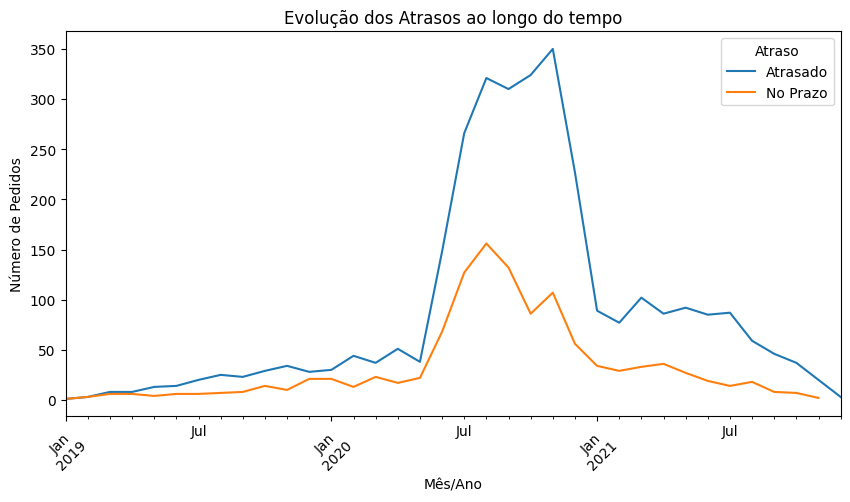

In [ ]:
df.groupby("Mês_Ano")["Atraso"].value_counts().unstack().plot(kind="line", figsize=(10,5))
plt.title("Evolução dos Atrasos ao longo do tempo")
plt.xlabel("Mês/Ano")
plt.ylabel("Número de Pedidos")
plt.xticks(rotation=45)
plt.show()

#**🔟 Impacto financeiro dos atrasos**

Atraso
Atrasado    1064435.8
No Prazo     387325.9
Name: R$ Faturados, dtype: float64


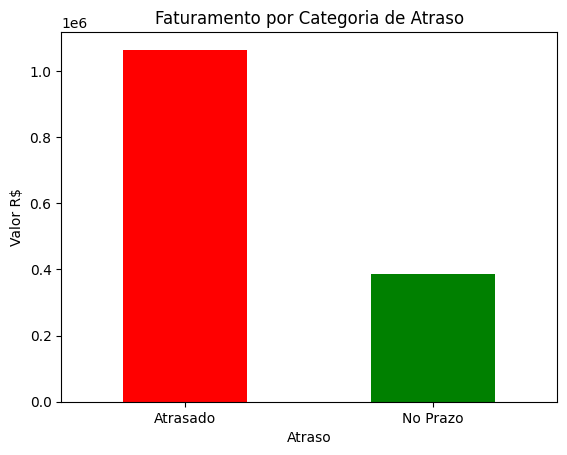

In [ ]:
faturamento_atraso = df.groupby("Atraso")["R$ Faturados"].sum()

# Exibir os valores
print(faturamento_atraso)

# Criar gráfico de barras
faturamento_atraso.plot(kind="bar", title="Faturamento por Categoria de Atraso", color=["red", "green"])
plt.ylabel("Valor R$")
plt.xticks(rotation=0)
plt.show()


#**1️⃣1️⃣ Análise do ticket médio por categoria de atraso**

In [ ]:
# Verificar se pedidos atrasados têm um ticket médio menor.

ticket_medio = df.groupby("Atraso")["R$ Faturados"].mean()
print("\nTicket médio por categoria de atraso:")
print(ticket_medio)


Ticket médio por categoria de atraso:
Atraso
Atrasado    339.532951
No Prazo    337.686051
Name: R$ Faturados, dtype: float64


#**1️⃣2️⃣ Visualização dos motivos de devolução**

Mot. Devolução
Produto Errado    36.478281
Danificado        31.270434
S/ Devolu.        24.754787
Arrependimento     7.496497
Name: count, dtype: float64


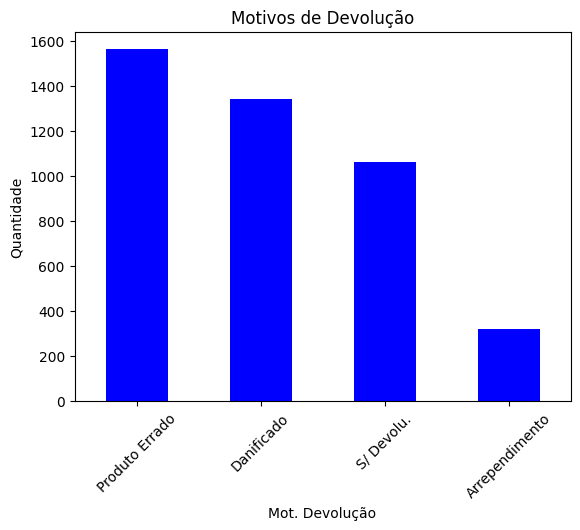

In [ ]:
# Contar motivos de devolução
devolucoes = df["Mot. Devolução"].value_counts()

# Exibir percentuais
percentual_devolucoes = (devolucoes / devolucoes.sum()) * 100
print(percentual_devolucoes)

# Criar gráfico
devolucoes.plot(kind="bar", title="Motivos de Devolução", color="blue")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.show()



#***📌 Insights Finais***

#📊 Dados:

Belo Horizonte (BH): 73,26% dos pedidos atrasam.

Rio de Janeiro (RJ): 73,14% dos pedidos atrasam.

São Paulo (SP): 73,23% dos pedidos atrasam.

#📌 Interpretação:

Os três destinos desenvolvidos possuem um alto percentual de atrasos, todos acima de 73% .

Belo Horizonte (BH) apresenta a maior taxa de atrasos (73,26%) , seguida por São Paulo (SP) e Rio de Janeiro (RJ) com valores muito próximos.

Esse dado indica um possível problema estrutural nas entregas para esses locais.

Pode estar relacionado a fatores como trânsito, disponibilidade de transporte ou questões logísticas.

#✅ Ação sugerida:

Investigue as rotas de entrega para esses destinos e descubra se há gargalos específicos.

Teste alternativas como antecipação de envio para essas regiões ou busque parceiros logísticos mais eficientes.

#📊 Dados:

Categoria de Atraso	Faturamento (R$)

Atrasado	1.064.435,80

No Prazo	387.325,90

#📌 Interpretação:

A maior parte do faturamento ( mais de R$ 1 milhão ) está atrelada a entregas atrasadas .

Isso pode indicar que, mesmo com atrasos, as vendas continuam acontecendo, mas podem gerar insatisfação do cliente e aumento de devoluções.

Também é importante verificar se há impacto na recompra .

Clientes que enfrentam atrasos constantes podem deixar de comprar novamente.

#✅ Ação sugerida:

Monitorar feedbacks dos clientes para avaliar se os atrasos estão impactando a percepção da marca.

Comparar com dados históricos para ver se os atrasos aumentaram ou diminuíram ao longo do tempo.

#📊 Dados:

Dia da Semana ;	% Atrasado ;	% No Prazo

Sexta-feira ;	75,30% ;	24,69%

Sábado ;	74,71% ;	25,28%

Quinta-feira ;	74,56% ;	25,44%

#📌 Interpretação:

Os pedidos feitos às sextas-feiras apresentam o maior percentual de atrasos (75,30%) .

Sábados e quintas-feiras também apresentam alta taxa de atraso , indicando que o problema pode estar relacionado à logística de fim de semana.

O menor percentual de atrasos ocorre nos domingos e terças-feiras, indicando que esses dias podem ter menor volume de pedidos ou um fluxo operacional mais eficiente.

#✅ Ação sugerida:

Ajustar a distribuição da carga de trabalho da equipe logística para reduzir gargalos nas sextas-feiras e finais de semana.

Considerar ajustes no planejamento de envio , talvez antecipando as entregas de pedidos feitos nesses dias.


#📊 Dados:

Produto Errado é o principal motivo, com mais de 1.500 devoluções.

Produtos Danificados também representam um grande problema, com cerca de 1.300 casos.

Sem Justificativa (S/J Devolu.) aparece com mais de 1.000 ocorrências, o que pode indicar falhas no registro dos motivos.

#📌 Interpretação:

Produto errado é o principal motivo de devolução, seguido por produto danificado e sem justificativa de devolução .

O alto número de devoluções sem justificativa pode indicar que os clientes não estão explicando os motivos reais , o que dificulta a solução do problema.

O arrependimento de compra tem um percentual baixo , indicando que a maioria das devoluções está ligada à operação e não a mudanças de decisão dos clientes.
#✅ Ação sugerida:

Revisar processos de conferência e separação de pedidos para evitar envios errados.

Melhorar a proteção de embalagens para reduzir avarias no transporte.

Criar um canal de feedback para entender os reais motivos das devoluções sem justificativa.
